Model taken from 

    Smith, Amber M., and Amanda P. Smith. "A critical, nonlinear threshold dictates bacterial invasion and initial kinetics during influenza." Scientific reports 6.1 (2016): 38703.

In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_coinfection
from stochastic_tests import Test

t_fin = 18.0
num_steps = 100
param_range_fact = 0.5

param_nominal_vals = {'beta': 2.8E-6,
                      'k': 4.0,
                      'delta': 0.89,
                      'p': 25.1,
                      'c': 28.4,
                      'r': 27.0,
                      'KP': 2.3E8,
                      'gammaMA': 1.35E-4,
                      'psi': 1.2E-8,
                      't0': 7.0}

test = Test(model=model_coinfection({k: ('uniform', (v * (1-param_range_fact), v * (1+param_range_fact))) for k, v in param_nominal_vals.items()}),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=False)

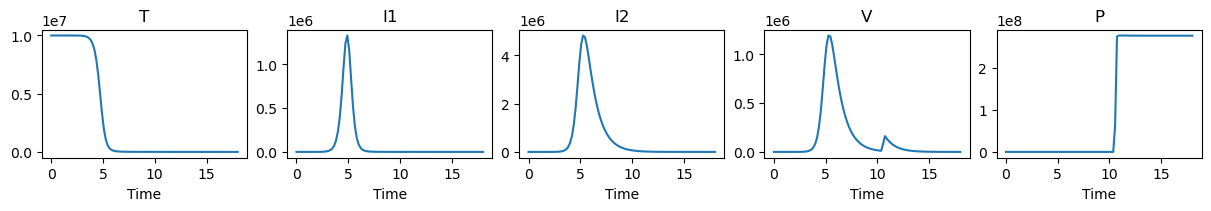

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

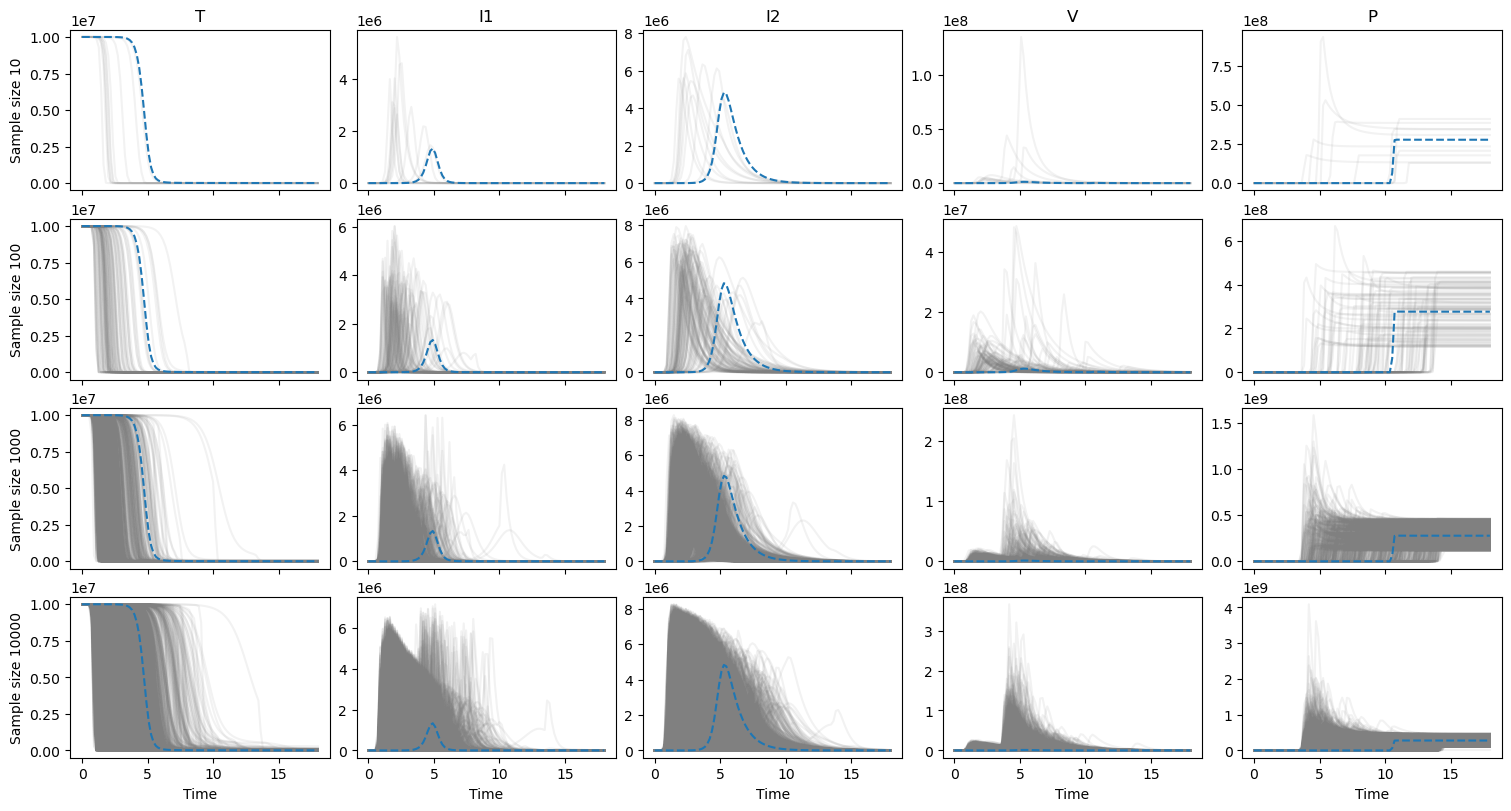

In [4]:
_ = test.plot_results_stochastic()

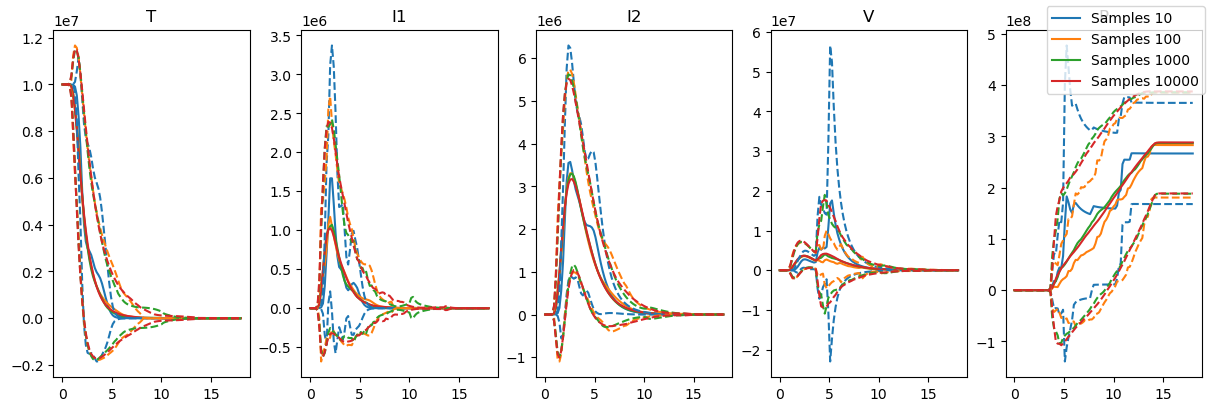

In [5]:
_ = test.plot_stats()

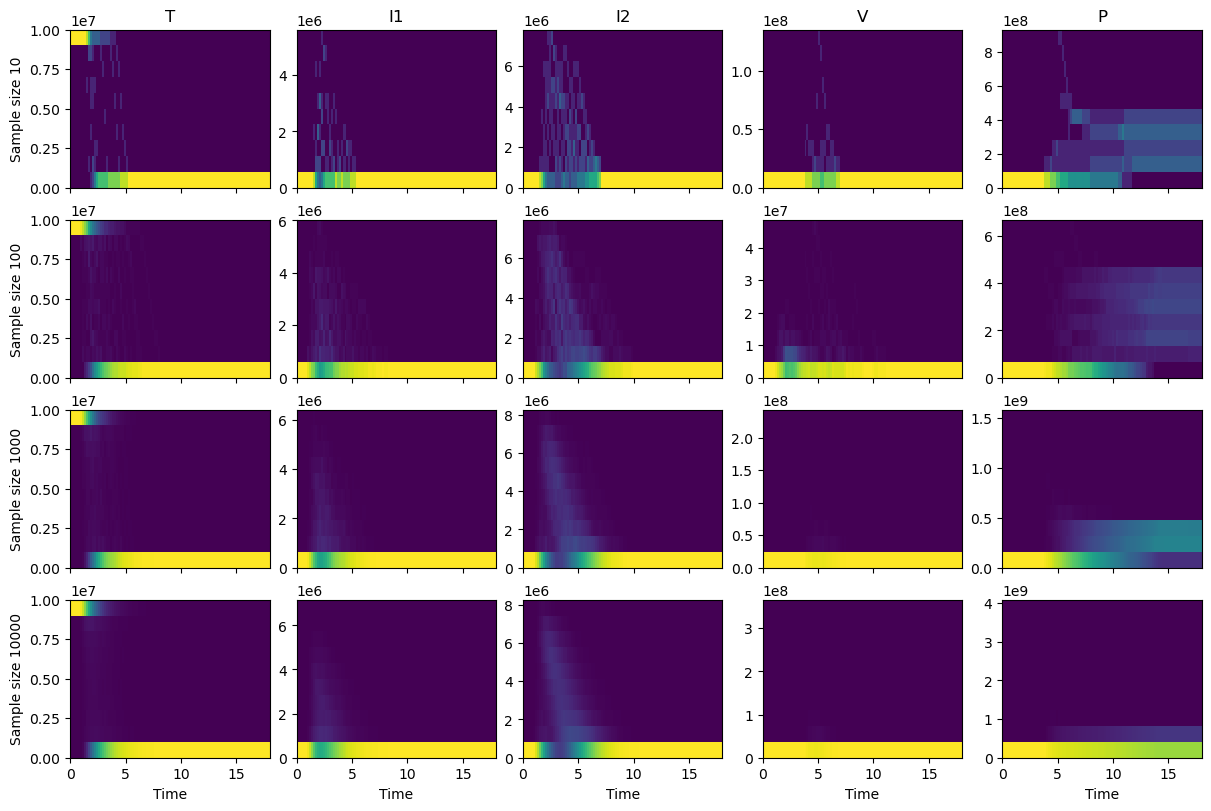

In [6]:
_ = test.plot_distributions()

In [7]:
test.find_ecfs()
test.measure_ecf_diffs()

In [8]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	T: 1.4390318643920965
	I1: 1.610786447329241
	I2: 1.6481390571697807
	V: 1.5841291605900858
	P: 1.4545984265192249
100 trials
	T: 0.4155660416054611
	I1: 0.46741976095039683
	I2: 0.5190392078224821
	V: 0.5185633383570717
	P: 0.4587304066686019
1000 trials
	T: 0.12878456628746696
	I1: 0.14697464819953904
	I2: 0.15743541406303885
	V: 0.15484766085575444
	P: 0.1520024232795106
10000 trials
	T: 0.053143726332730595
	I1: 0.05252766136132658
	I2: 0.056961206586514455
	V: 0.0461401319179437
	P: 0.043802864723249624


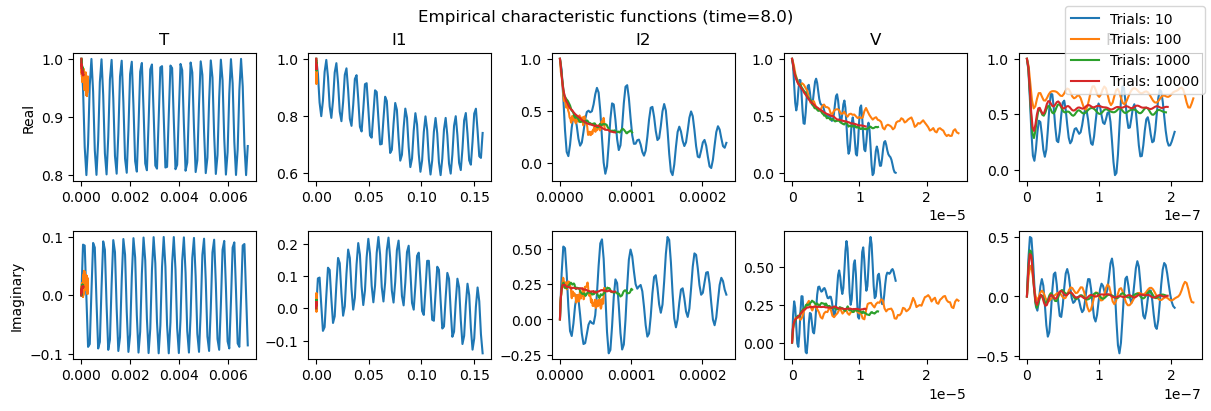

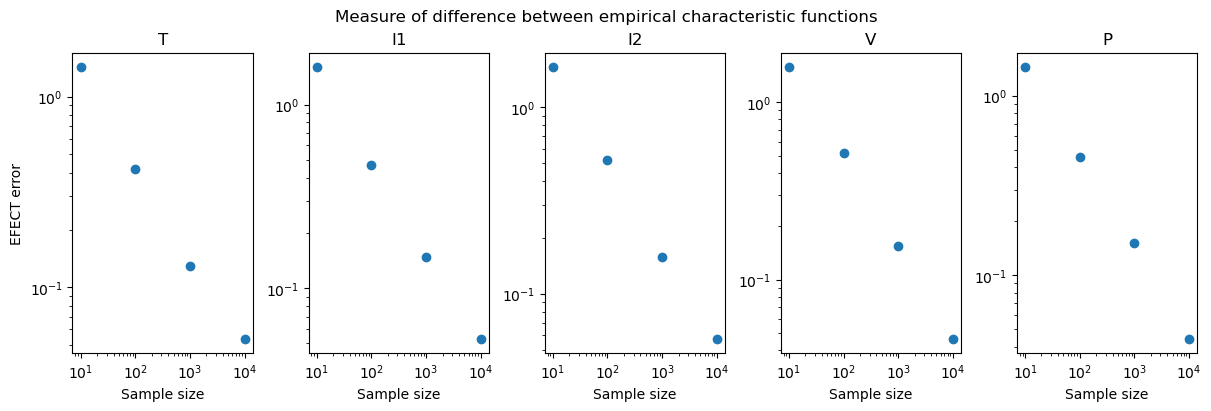

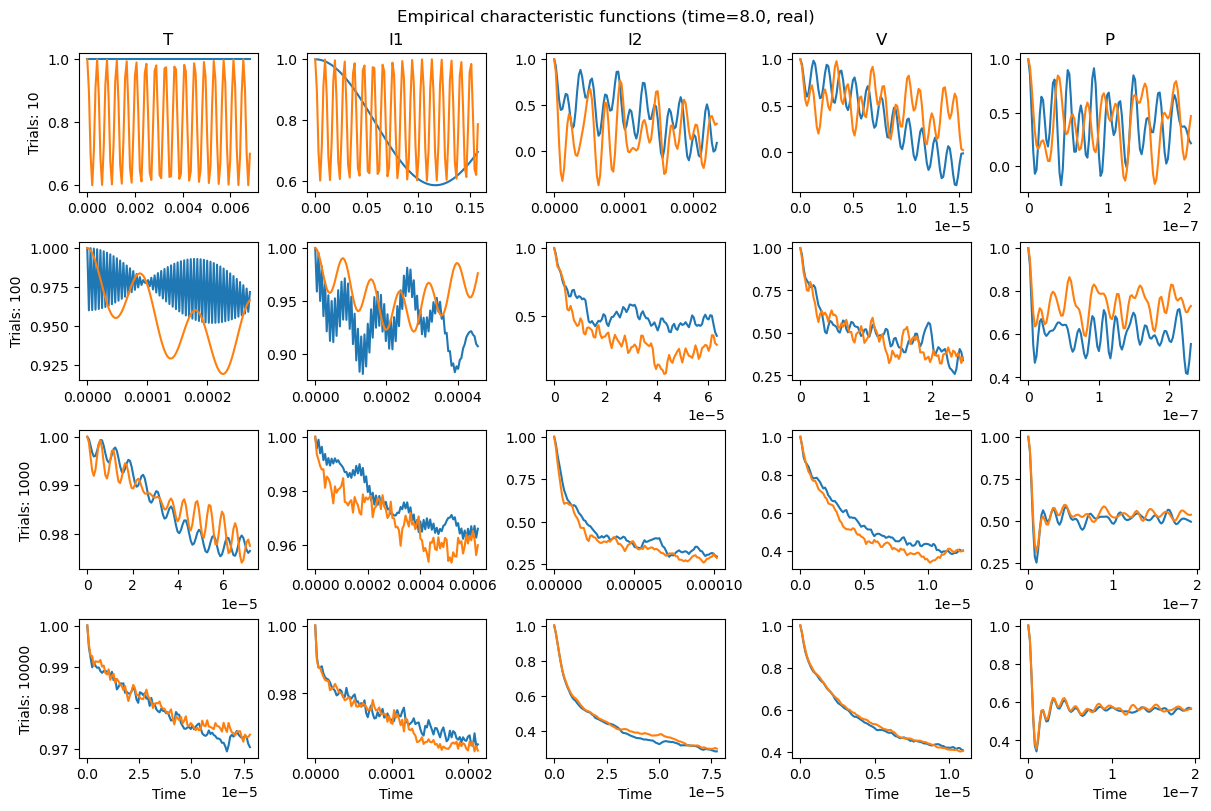

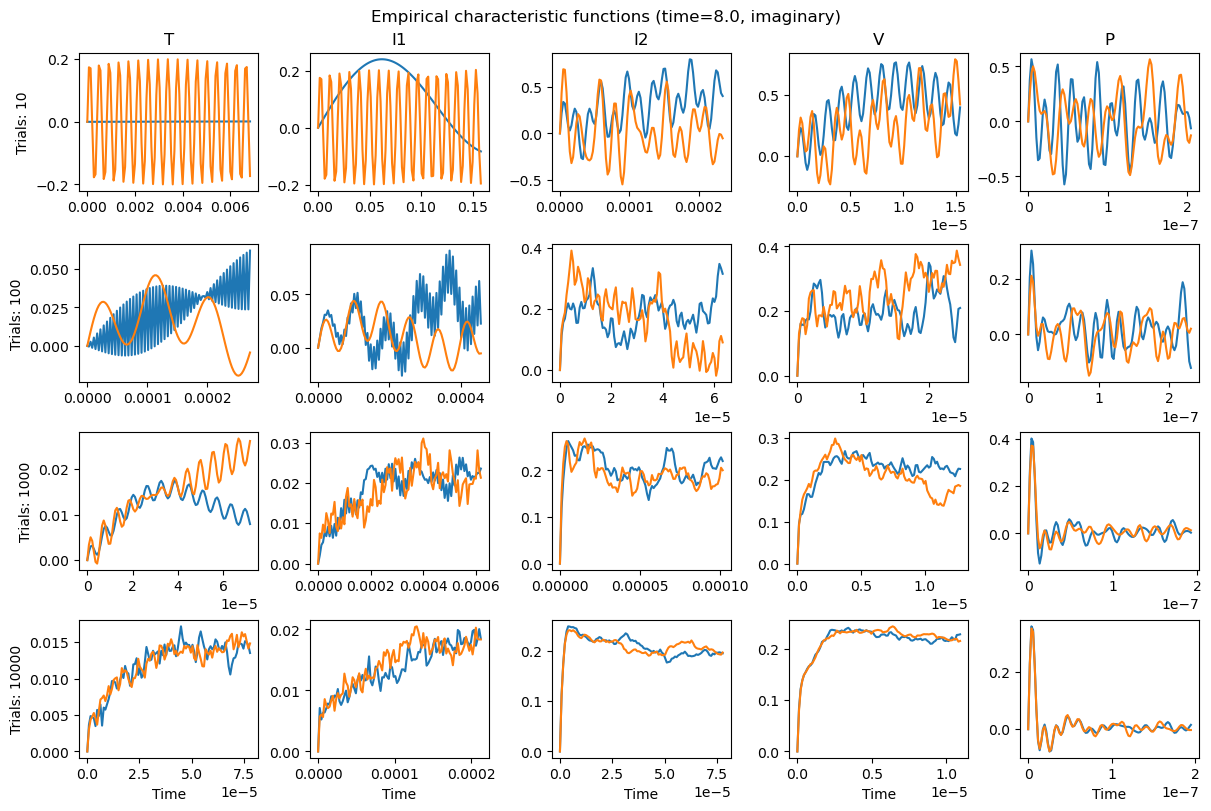

In [9]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [10]:
test.generate_ecf_diff_fits()

C:\Users\timothy.sego\AppData\Local\miniconda3\envs\stoch_repro\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


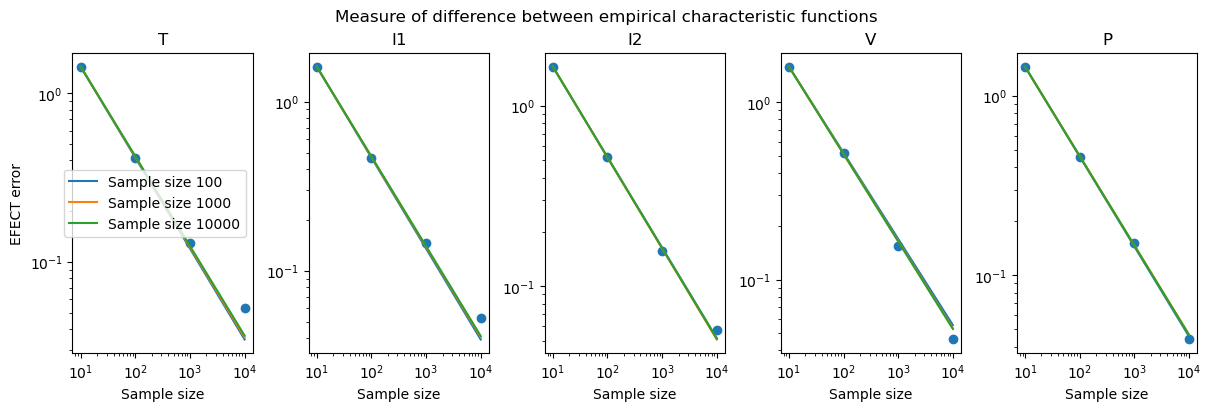

In [11]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [12]:
# Runtime: ~12 minutes (M1 max)
test.test_sampling(err_thresh=1E-3)

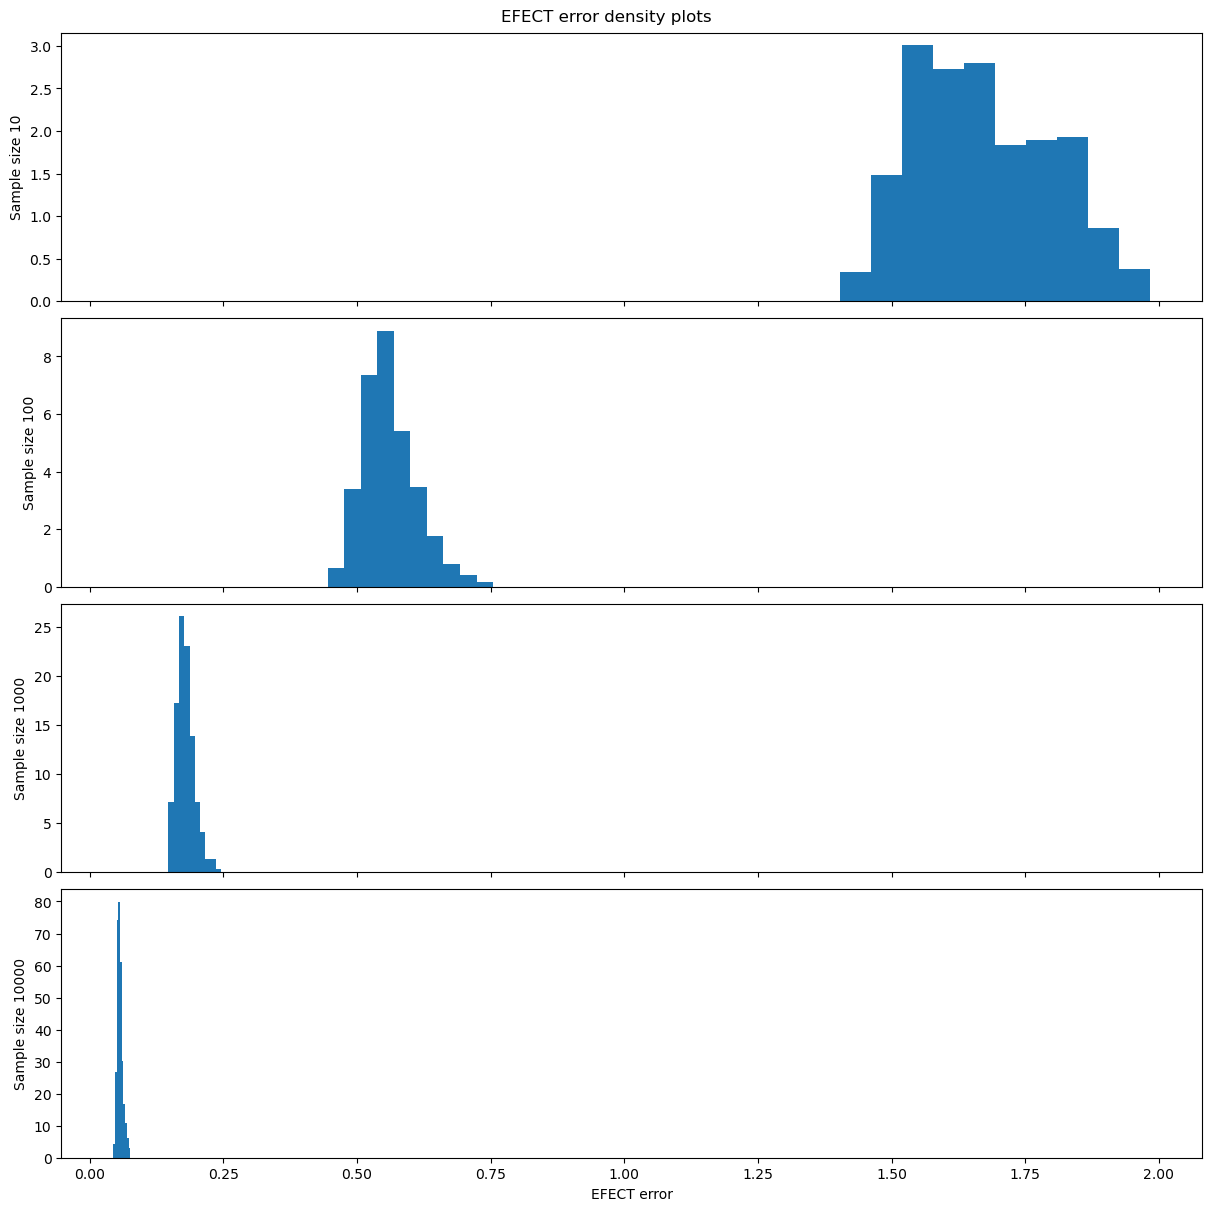

In [13]:
_ = test.plot_ks_sampling()

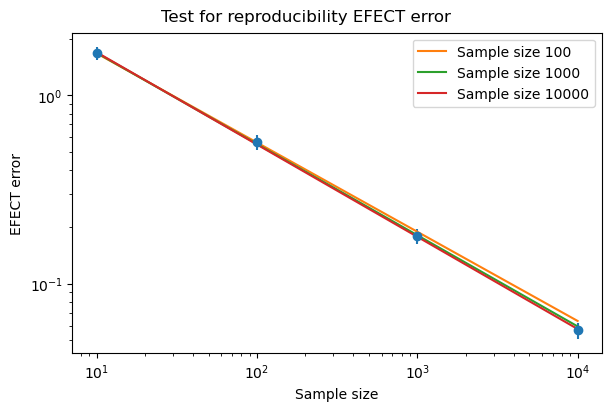

In [14]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()